In [1]:
import pandas as pd
import numpy as np

## Quick look at the data sructure

In [2]:
df = pd.read_csv('housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Dataset columns
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


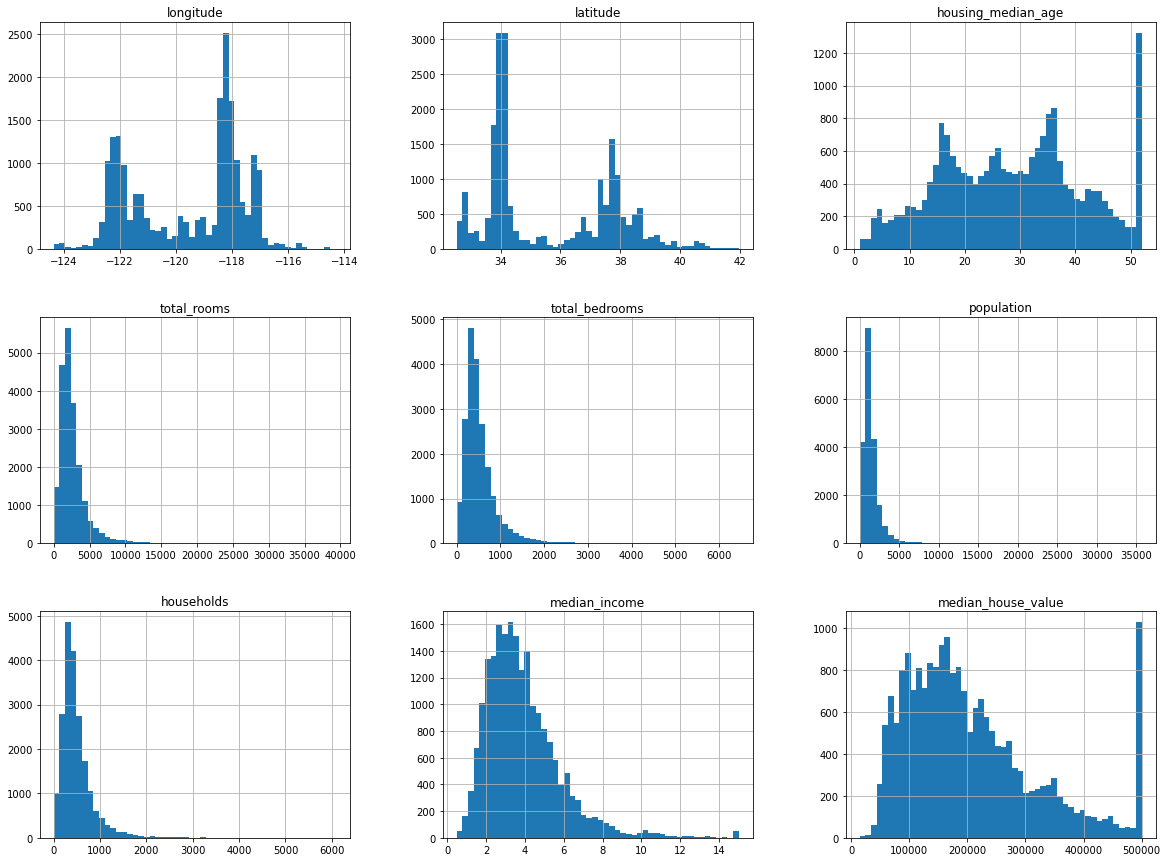

In [5]:
from matplotlib import pyplot as plt

# Data histogram
df.hist(
    bins = 50, 
    figsize = (20, 15)
)

plt.show()

## Data visualization 

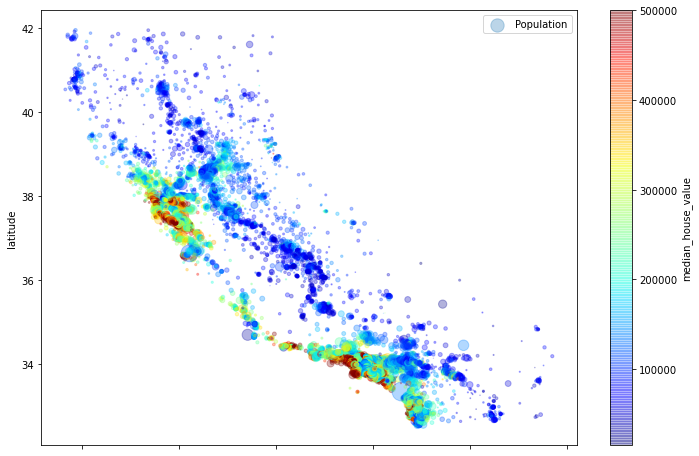

In [6]:
# Data visualization
df.plot(
    kind = 'scatter', 
    x = 'longitude', 
    y = 'latitude',
    alpha = 0.3,
    s = df['population'] / 100,
    label = 'Population',
    c = 'median_house_value',
    cmap = plt.get_cmap('jet'),
    colorbar = True,
    figsize = (12, 8)
)
plt.legend()

In [7]:
# Correlation matrix
corr_matrix = df.corr()

# Correlation with target value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

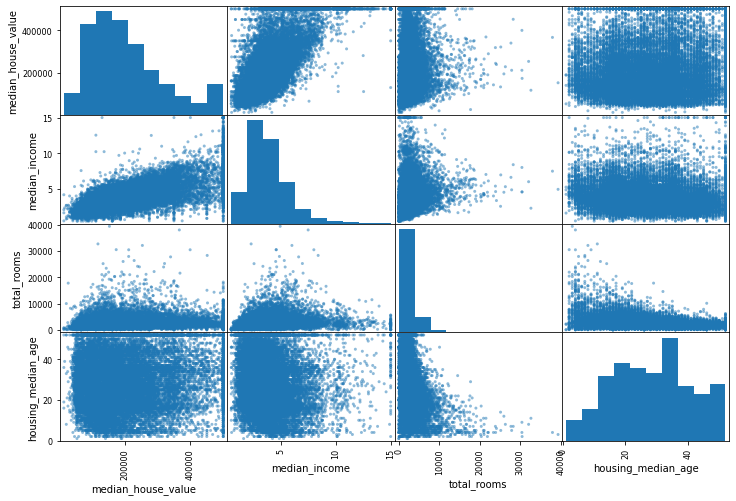

In [8]:
from pandas.plotting import scatter_matrix

# Data correlation with scatter matriz
attributes = [
    'median_house_value', 'median_income', 'total_rooms', 'housing_median_age'
]

scatter_matrix(
    df[attributes], figsize=(12, 8)
);

<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

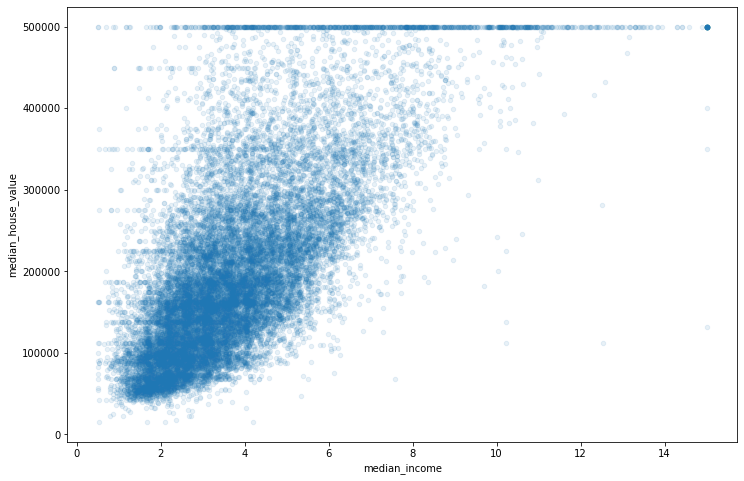

In [9]:
# The most correlated value with the target value (median_housing_value) is median_income

df.plot(
    kind = 'scatter', 
    x = 'median_income',
    y = 'median_house_value', 
    alpha = 0.1,
    figsize = (12, 8)
)

## Attribute combinations

In [10]:
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']

df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,0.172096,2.181467


In [11]:
corr_matriz = df.corr() 
corr_matriz['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

## Prepare data for Machine Learning algorithms

In [12]:
df.isnull().sum()

longitude                     0
latitude                      0
housing_median_age            0
total_rooms                   0
total_bedrooms              207
population                    0
households                    0
median_income                 0
median_house_value            0
ocean_proximity               0
rooms_per_household           0
bedrooms_per_room           207
population_per_household      0
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

# Use SimpleImouter to fill missing values
imputer = SimpleImputer(strategy='median')

# Dataframe numerical values
df_num = df.drop('ocean_proximity', axis=1)

imputer.fit(df_num)

SimpleImputer(strategy='median')

In [14]:
imputer.statistics_

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [15]:
df_num.median().values

array([-1.18490000e+02,  3.42600000e+01,  2.90000000e+01,  2.12700000e+03,
        4.35000000e+02,  1.16600000e+03,  4.09000000e+02,  3.53480000e+00,
        1.79700000e+05,  5.22912879e+00,  2.03162434e-01,  2.81811565e+00])

In [16]:
X = imputer.transform(df_num)

# Create a DataFrmae with transformed values
df_tr = pd.DataFrame(X, columns=df_num.columns)
df_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,6.984127,0.146591,2.555556
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,6.238137,0.155797,2.109842
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,8.288136,0.129516,2.802260
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,5.817352,0.184458,2.547945
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,6.281853,0.172096,2.181467


## Handling categorical values

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder() 

df_cat = df[['ocean_proximity']]

df_cat_encoded = encoder.fit_transform(df_cat)

df_cat_encoded

/Users/kevinliaoo/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


array([3, 3, 3, ..., 1, 1, 1])

In [18]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

In [19]:
from sklearn.preprocessing import OneHotEncoder

# Convert integer categorical values into one-hot vectors
encoder = OneHotEncoder() 

df_cat_ohe = encoder.fit_transform(df_cat_encoded.reshape(-1, 1)) # We need a 2D array

df_cat_ohe

<20640x5 sparse matrix of type '<class 'numpy.float64'>'
	with 20640 stored elements in Compressed Sparse Row format>

In [20]:
df_cat_ohe.toarray()

array([[0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

## Feature scaling

In [21]:
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin): 
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names 
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [22]:
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler

# Numerical attributes
num_attrs = list(df_num)

# Numerical values pipeline
num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attrs)),
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler()),
])

df_num_tr = num_pipeline.fit_transform(df_num)
df_num_tr

array([[-1.32783522,  1.05254828,  0.98214266, ...,  0.62855945,
        -1.14993031, -0.04959654],
       [-1.32284391,  1.04318455, -0.60701891, ...,  0.32704136,
        -0.99038135, -0.09251223],
       [-1.33282653,  1.03850269,  1.85618152, ...,  1.15562047,
        -1.44586501, -0.02584253],
       ...,
       [-0.8237132 ,  1.77823747, -0.92485123, ..., -0.09031802,
         0.03870567, -0.0717345 ],
       [-0.87362627,  1.77823747, -0.84539315, ..., -0.04021111,
         0.12050112, -0.09122515],
       [-0.83369581,  1.75014627, -1.00430931, ..., -0.07044252,
         0.14290124, -0.04368215]])

In [23]:
df_num_tr = pd.DataFrame(df_num_tr, columns=list(df_num))

df_num_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.149930,-0.049597
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.990381,-0.092512
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.445865,-0.025843
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.493627,-0.050329
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.707889,-0.085616


In [24]:
from sklearn.preprocessing import LabelBinarizer

# Categorical attributes
cat_attrs = ['ocean_proximity']

# LabelBinarizer = LabelEncoder + OneHotEncoder
encoder = LabelBinarizer() 

df_cat_tr = encoder.fit_transform(df_cat)
df_cat_tr

array([[0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       ...,
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 1, 0, 0, 0]])

In [25]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

In [26]:
df_cat_tr = pd.DataFrame(df_cat_tr, columns=encoder.classes_)

df_cat_tr.head()

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0


In [27]:
# Join two datasets
df_tr = pd.concat([df_num_tr, df_cat_tr], axis=1)
df_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.972476,-0.974429,-0.977033,2.344766,2.129631,0.628559,-1.149930,-0.049597,0,0,0,1,0
1,-1.322844,1.043185,-0.607019,2.045890,1.357143,0.861439,1.669961,2.332238,1.314156,0.327041,-0.990381,-0.092512,0,0,0,1,0
2,-1.332827,1.038503,1.856182,-0.535746,-0.827024,-0.820777,-0.843637,1.782699,1.258693,1.155620,-1.445865,-0.025843,0,0,0,1,0
3,-1.337818,1.038503,1.856182,-0.624215,-0.719723,-0.766028,-0.733781,0.932968,1.165100,0.156966,-0.493627,-0.050329,0,0,0,1,0
4,-1.337818,1.038503,1.856182,-0.462404,-0.612423,-0.759847,-0.629157,-0.012881,1.172900,0.344711,-0.707889,-0.085616,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.388283,-0.512592,-0.443449,-1.216128,-1.115804,-0.155023,0.202517,-0.049110,0,1,0,0,0
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.922403,-0.944405,-1.008420,-0.691593,-1.124470,0.276881,0.039312,0.005021,0,1,0,0,0
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.123608,-0.369537,-0.174042,-1.142593,-0.992746,-0.090318,0.038706,-0.071735,0,1,0,0,0
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.304827,-0.604429,-0.393753,-1.054583,-1.058608,-0.040211,0.120501,-0.091225,0,1,0,0,0


## Training a model

In [28]:
from sklearn.model_selection import train_test_split

y = df_tr['median_house_value']
X = df_tr.drop('median_house_value', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
from sklearn.linear_model import LinearRegression 

lin_reg = LinearRegression() 
lin_reg.fit(X_train, y_train)

LinearRegression()

In [30]:
# Make some predictions 
some_data = X_test.iloc[:5]
some_features = y_test.iloc[:5]
some_predictions = lin_reg.predict(some_data)

print('Predictions: ', some_predictions)
print('Labels: ', some_features.values)

Predictions:  [-1.47567382 -0.59952218  0.7513832   0.6495872   0.49062178]
Labels:  [-1.37925233 -1.39571783  2.54041094  0.10177568  0.61653908]


In [31]:
from sklearn.metrics import mean_squared_error 

# Evaluate the model
predictions = lin_reg.predict(X_test)

lin_mse = mean_squared_error(y_test, predictions)
lin_rmse = np.sqrt(lin_mse)

print('Root mean squared error: ', lin_rmse)

# The LinearRegression model is underfitting 

Root mean squared error:  0.5990564465372522


In [32]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor() 

tree_reg.fit(X_train, y_train)

predictions = tree_reg.predict(X_test)

tree_mse = mean_squared_error(y_test, predictions)
tree_rmse = np.sqrt(tree_mse)

print('Root mean squared error: ', tree_rmse)

Root mean squared error:  0.6109003055485698


In [33]:
def displayScores(scores): 
    print('Mean: ', scores.mean())
    print('STD: ', scores.std())

In [34]:
from sklearn.model_selection import cross_val_score

tree_scores = cross_val_score(
    tree_reg, 
    X, y, 
    scoring = 'neg_mean_squared_error', 
    cv = 10 
)

rmse_scores = np.sqrt(-tree_scores)

displayScores(rmse_scores)

# The DecisionTreeRegressor is overfitting

Mean:  0.7412499857401357
STD:  0.1315589298450463


In [35]:
lin_scores = cross_val_score(
    lin_reg, 
    X, y, 
    scoring = 'neg_mean_squared_error', 
    cv = 10 
)

rmse_scores = np.sqrt(-lin_scores)

displayScores(rmse_scores)

Mean:  872047950.2402191
STD:  2616143848.8933835


In [37]:
from sklearn.ensemble import RandomForestRegressor 

forest_reg = RandomForestRegressor()

forest_scores = cross_val_score(
    forest_reg, 
    X, y, cv = 10, 
    scoring = 'neg_mean_squared_error'
)

rmse_scores = np.sqrt(-forest_scores)

displayScores(rmse_scores)

Mean:  0.5527471766709109
STD:  0.1312776443467086


In [38]:
from sklearn.model_selection import GridSearchCV

# Use GridSearch to fine tune my model
param_grid = [
    {
        'n_estimators': [3, 10, 30], 
        'max_features': [2, 4, 6, 8], 
    }, 
    {
        'bootstrap': [False], 
        'n_estimators': [3, 10], 
        'max_features': [2, 3, 4], 
    }, 
]

forest_reg = RandomForestRegressor() 

grid_search = GridSearchCV(
    forest_reg, 
    param_grid, 
    cv = 5, 
    scoring = 'neg_mean_squared_error'
)

grid_search.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             scoring='neg_mean_squared_error')

In [39]:
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [41]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

## Analyze the best model 

In [42]:
# Importance of each feature
feature_importances = grid_search.best_estimator_.feature_importances_ 
feature_importances

array([8.66068217e-02, 8.59668516e-02, 4.29220007e-02, 2.29762317e-02,
       2.02509406e-02, 2.17628327e-02, 1.96649061e-02, 2.89649150e-01,
       6.75282616e-02, 8.29353809e-02, 1.02657259e-01, 1.84699251e-02,
       1.24062147e-01, 2.49470891e-04, 4.72397262e-03, 9.57384768e-03])

In [43]:
attributes = list(df_tr)
sorted(zip(feature_importances, attributes), reverse=True)

[(0.2896491503459634, 'median_income'),
 (0.12406214689289471, '<1H OCEAN'),
 (0.10265725905460228, 'bedrooms_per_room'),
 (0.08660682171668901, 'longitude'),
 (0.08596685155565804, 'latitude'),
 (0.08293538086196776, 'rooms_per_household'),
 (0.06752826156200468, 'median_house_value'),
 (0.042922000716728664, 'housing_median_age'),
 (0.0229762316586209, 'total_rooms'),
 (0.021762832692040223, 'population'),
 (0.020250940600699874, 'total_bedrooms'),
 (0.0196649060801825, 'households'),
 (0.0184699250716434, 'population_per_household'),
 (0.009573847681893306, 'NEAR BAY'),
 (0.004723972617692032, 'ISLAND'),
 (0.00024947089071914586, 'INLAND')]